#### Importing necessary libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore') #ignore warning to imporve readability

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from imblearn.combine import SMOTETomek
from sklearn.metrics import precision_recall_curve

In [5]:
#display all columns in dataframe
pd.pandas.set_option('display.max_columns',None)

#### Read the dataset:

In [6]:
os.chdir('C:\\Users\\S Rengashree\\Desktop\\Capstone project')
os.getcwd()

'C:\\Users\\S Rengashree\\Desktop\\Capstone project'

In [7]:
df = pd.read_csv('Stroke.csv')
df.head()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


#### Displaying basic information on the dataset:

In [8]:
print('Information on dataset:\n')
df.info()

Information on dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43400 non-null  int64  
 1   Gender             43400 non-null  object 
 2   Age                43400 non-null  float64
 3   Hypertension       43400 non-null  int64  
 4   Heart_Disease      43400 non-null  int64  
 5   Ever_Married       43400 non-null  object 
 6   Work_Type          43400 non-null  object 
 7   Residence_Type     43400 non-null  object 
 8   Avg_Glucose_Level  43400 non-null  float64
 9   BMI                41938 non-null  float64
 10  Smoking_Status     30108 non-null  object 
 11  Stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [9]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])
print('Shape of the dataset:',df.shape)

Number of rows: 43400
Number of columns: 12
Shape of the dataset: (43400, 12)


In [10]:
print('Features in the dataset:\n',df.columns)

Features in the dataset:
 Index(['ID', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')


In [11]:
print('Descriptive statistics on the dataset:')
df.describe().transpose()

Descriptive statistics on the dataset:


,count,mean,std,min,25%,50%,75%,max
ID,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.00
Age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
Hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
Heart_Disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
Avg_Glucose_Level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
BMI,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60
Stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


In [12]:
print('Datatype of the features:')
df.dtypes

Datatype of the features:


ID                     int64
Gender                object
Age                  float64
Hypertension           int64
Heart_Disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
dtype: object

In [13]:
df.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

In [14]:
data = df.copy()

#### Exploratory Data Analysis:

#### Checking prevalence rate of the dataset:

#### Prevalence Rate: 
It is used to find if the data set is balanced or not. The condition for balanced data is the minority class of the dataset should have more than 25% of data. Example: 60-40,70-30. In this the minority class is having 40 and 30 percent of data respectively. So such dataset are balanced.

We can use this to find the metrics that we will adopt for the model.

If the actual value is 0 and model is predicting 1, it is called 'False-Positive(FP)'.
If the actual value is 1 and model is predicting 0, it is called 'False-Negative(FN)'.
If the actual value is 0 and model is predicting 0, it is called 'True-Negative(TN)'.
If the actual value is 1 and model is predicting 1, it is called 'True-Positive(TP)'.
If the dataset is balanced the metrics we use is Accuracy. Else depending on 'False-Positive(FP)' and 'False-Negative(FN)' and their misclassification we can go for Precision, Recall or F1-Score.

If concentration is more on FP -> Metrics = Precision.

If concentration is more on FN -> Metrics = Recall.

If concentration is more on both FN and FP -> Metrics = F1-Score. [Misclassification]

If concentration is more on both TN and TP -> Metrics = Accuracy. [Correct Classification]

This is done with the help of confusion matrix.

In [15]:
#Prevalence rate of the dataset
df['Stroke'].value_counts(normalize=True)

0    0.981959
1    0.018041
Name: Stroke, dtype: float64

We can see the the dataset is extremely imbalanced.

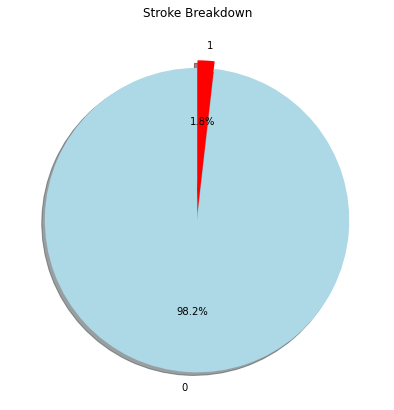

In [16]:
labels = df['Stroke'].value_counts(sort = True).index
sizes = df['Stroke'].value_counts(sort = True)
 
colors = ["lightblue","red"]
explode = (0.05,0) 
  
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
 
plt.title('Stroke Breakdown')
plt.show()

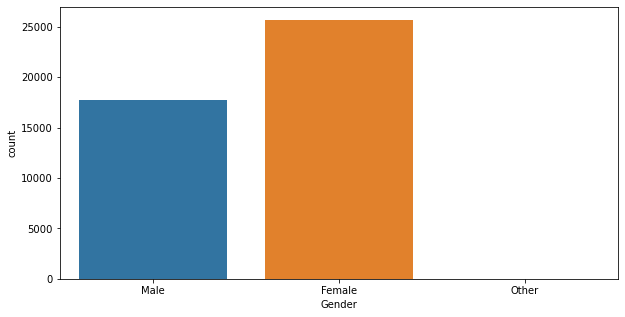

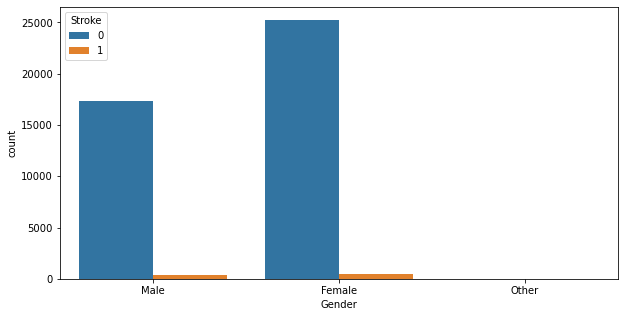

In [17]:
#Gender:

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Gender');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Gender',hue='Stroke')
plt.show()#This plot will help to analyze how gender will affect chances of stroke.

There is about 10000 diffrence between Female and Male in the data and Female has more stroke than male.

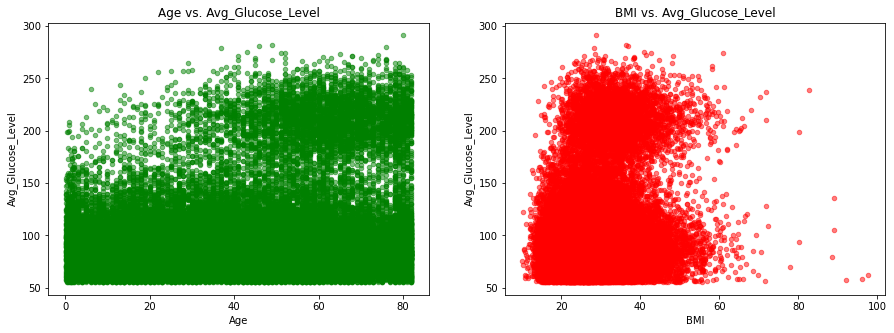

In [18]:
#Correlation with average glucose level

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='Age', y='Avg_Glucose_Level', alpha=0.5, color='green', ax=axes[0], title="Age vs. Avg_Glucose_Level")
df.plot(kind='scatter', x='BMI', y='Avg_Glucose_Level', alpha=0.5, color='red', ax=axes[1], title="BMI vs. Avg_Glucose_Level")
plt.show()

Average glucose level is high with old people.
BMI > 60 have low average glucose.

<Figure size 720x360 with 0 Axes>

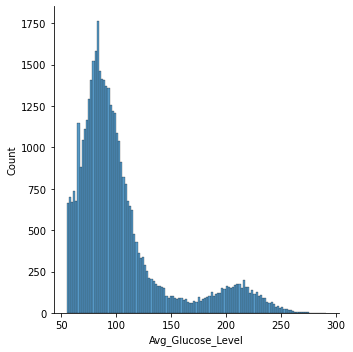

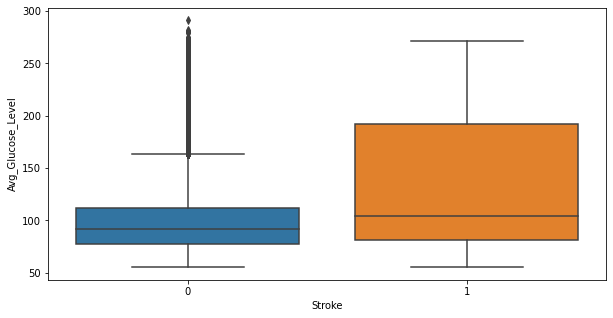

In [19]:
df['Avg_Glucose_Level'].nunique()
# Number of unique values
plt.figure(figsize=(10,5))
sns.displot(df['Avg_Glucose_Level'])
# Distribution of avg_glucose_level
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Stroke',y='Avg_Glucose_Level')
plt.show()
# Avg_glucose_level and Stroke

Observation:

From this above graph, we can see that people having stroke have an average glucose level of more than 100. There are some obvious outliers in patients who have no stroke but there are some chances of this being genuine records.

<Figure size 720x360 with 0 Axes>

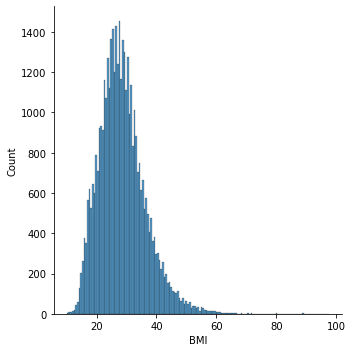

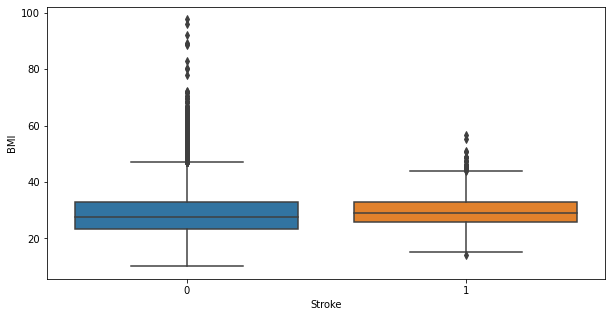

In [20]:
df['BMI'].isna().sum()

# Returns number null values
df['BMI'].nunique()

# Returns number of unique values in that attribute
plt.figure(figsize=(10,5))
sns.displot(df['BMI'])
plt.show()

# Distribution of bmi
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Stroke',y='BMI')
plt.show()
# BMI with respect to Stroke

There is as such no prominent observation of how does BMI affects the chances of having a stroke.

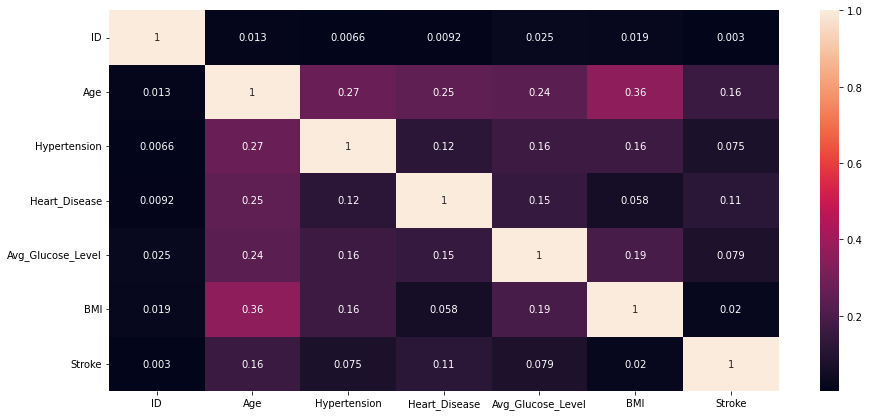

In [21]:
#Heatmap Correlation

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

There is no correlation between stroke and BMI.

In [22]:
#Stroke or not in Categorical Features

cat_df = df[['Gender','Residence_Type','Smoking_Status','Stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.Stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

Stroke                              0    1
Gender         Female           25234  431
               Male             17372  352
               Other               11    0
Residence_Type Rural            21260  384
               Urban            21357  399
Smoking_Status formerly smoked   7272  221
               never smoked     15769  284
               smokes            6429  133

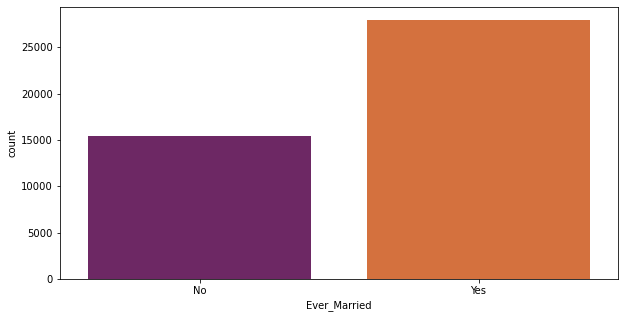

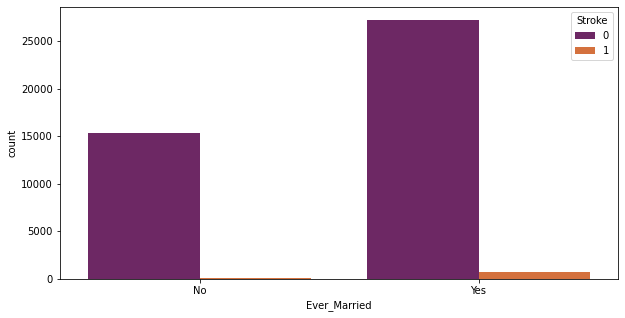

In [23]:
#Stroke/Ever Married

plt.figure(figsize=(10,5))
strok=df.loc[df['Stroke']==1]
sns.countplot(data=df,x='Ever_Married',palette='inferno');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Ever_Married',hue='Stroke',palette='inferno')
plt.show()#Ever married with respect of stroke

Stroke is common among married compared to not married.

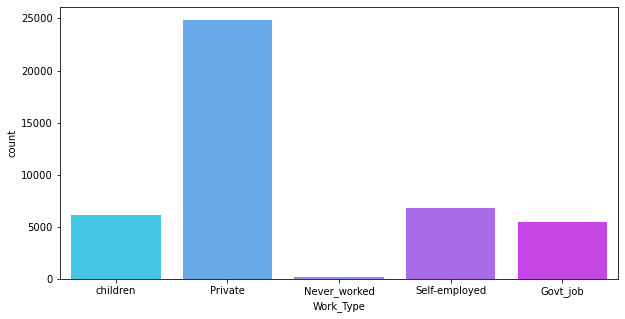

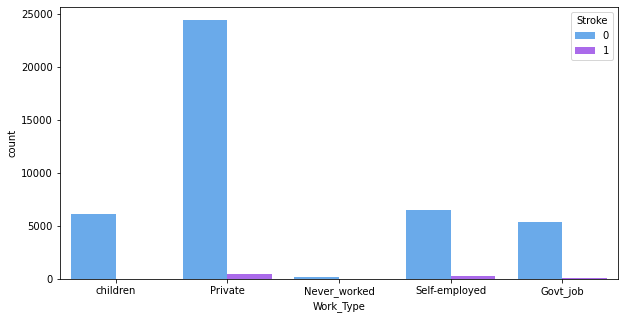

In [24]:
#Stroke/Work Type

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Work_Type',palette='cool');
plt.show()


plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Work_Type',hue='Stroke',palette='cool')
plt.show()#Above code will create a count plot with respect to stroke

Stroke is very common among people working in private sectors and very low never worked and children.

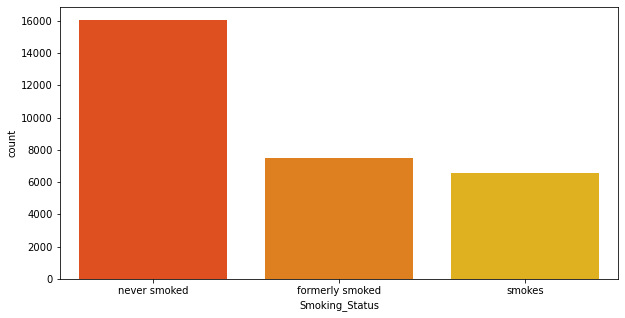

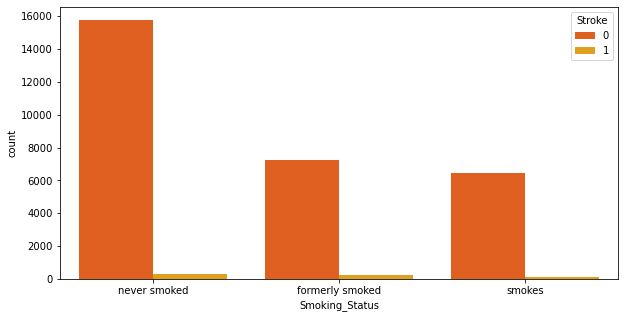

In [25]:
#Stroke/Smoking Status

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Smoking_Status',palette='autumn');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Smoking_Status',palette='autumn',hue='Stroke');
plt.show()

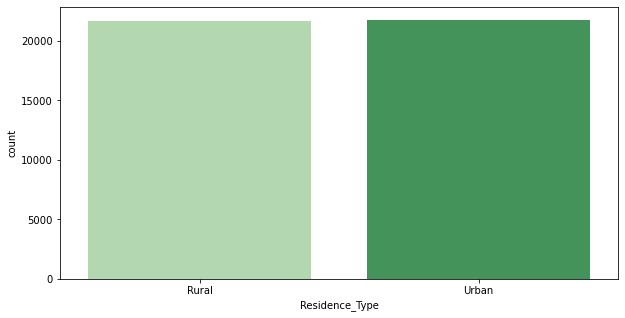

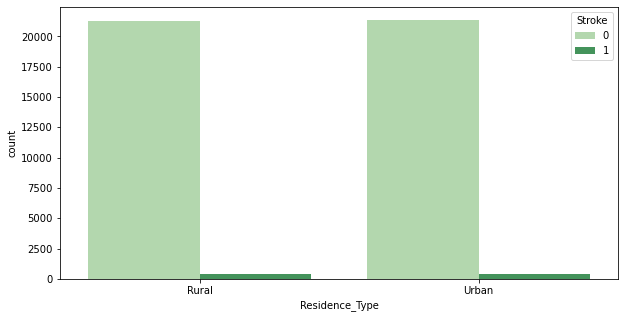

In [26]:
#Residence Type

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Residence_Type',palette='Greens');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Residence_Type',hue='Stroke',palette='Greens')
plt.show()#Residence Type with respect to stroke

Residence type does not affect stroke. It is more or less similar in both Rural and Urban.

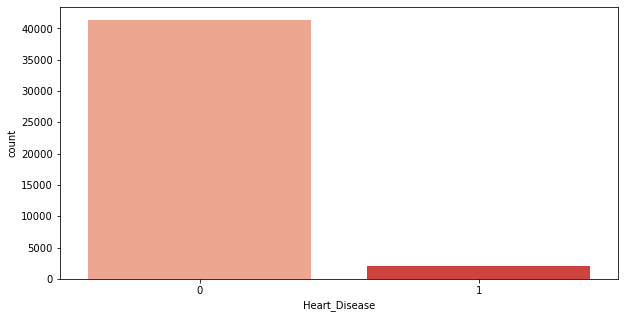

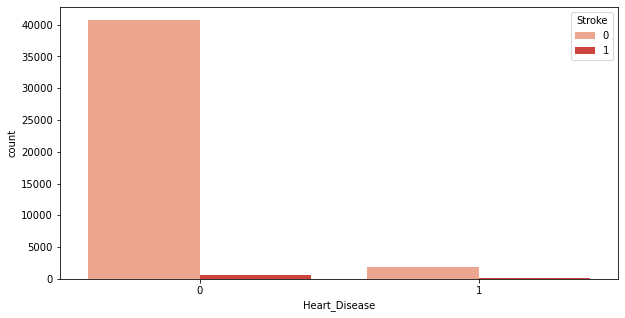

In [27]:
#Stroke/Heart Disease

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Heart_Disease',palette='Reds');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Heart_Disease',hue='Stroke',palette='Reds')
plt.show()

Most people who have had a stroke do not have any heart disease, but that does not prevent it being an influential factor.

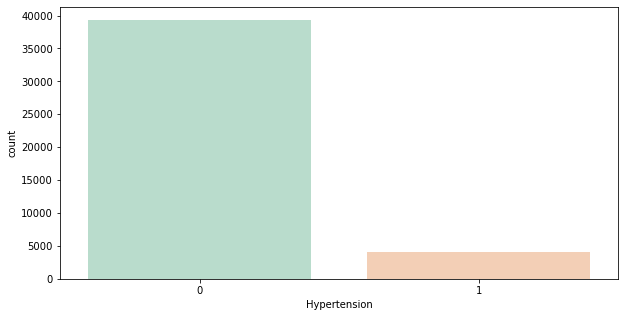

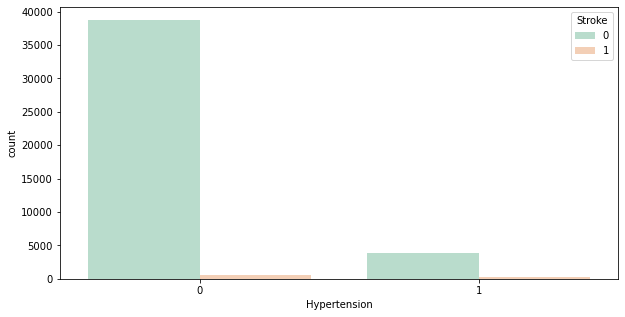

In [28]:
#Hypertension

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Hypertension',palette='Pastel2');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Hypertension',hue='Stroke',palette='Pastel2')
plt.show() #Above code will plot a boxplot of variable HYpertension with respect of target attribute stroke

Hypertension can cause a stroke. Based on our data picture is not that clear for hypertension. It has quite little data on patients having hypertension.

#### Finding missing values:

In [29]:
#Number of missing values
df.isna().sum()

ID                       0
Gender                   0
Age                      0
Hypertension             0
Heart_Disease            0
Ever_Married             0
Work_Type                0
Residence_Type           0
Avg_Glucose_Level        0
BMI                   1462
Smoking_Status       13292
Stroke                   0
dtype: int64

In [30]:
#Percentage of missing values
df.isna().mean()*100

ID                    0.000000
Gender                0.000000
Age                   0.000000
Hypertension          0.000000
Heart_Disease         0.000000
Ever_Married          0.000000
Work_Type             0.000000
Residence_Type        0.000000
Avg_Glucose_Level     0.000000
BMI                   3.368664
Smoking_Status       30.626728
Stroke                0.000000
dtype: float64

In [31]:
df1 = df.copy()

#### Fancyimput:
Fancyimpute is a library for missing data imputation algorithms. Fancyimpute use machine learning algorithm to impute missing values. Fancyimpute uses all the column to impute the missing values. There are two ways missing data can be imputed using Fancyimpute

1. KNN or K-Nearest Neighbor
2. MICE or Multiple Imputation by Chained Equation

#### K-Nearest Neighbor:
To fill out the missing values KNN finds out the similar data points among all the features. Then it took the average of all the points to fill in the missing values.

#### Multiple Imputation by Chained Equation:
MICE uses multiple imputation instead of single imputation which results in statistical uncertainty. MICE perform multiple regression over the sample data and take averages of them

In [32]:
df1.head()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [33]:
#we will drop unnecessary and unique columns and encode rest of data to impute
df1.drop(columns=['ID'],inplace = True, axis = 1)
df1.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [34]:
df1 = pd.get_dummies(df1, columns = ['Gender','Ever_Married','Work_Type','Residence_Type'],drop_first = True)
df1.head(5)

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Gender_Male,Gender_Other,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban
0,3.0,0,0,95.12,18.0,NaN,0,1,0,0,0,0,0,1,0
1,58.0,1,0,87.96,39.2,never smoked,0,1,0,1,0,1,0,0,1
2,8.0,0,0,110.89,17.6,NaN,0,0,0,0,0,1,0,0,1
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,0,1,0,1,0,0,0
4,14.0,0,0,161.28,19.1,NaN,0,1,0,0,1,0,0,0,0


In [35]:
bins = [0,27,54,82]
labels=[0,1,2]
df1['Age_new'] = pd.cut(df1['Age'], bins=bins, labels=labels, include_lowest=True)

In [36]:
df1.head()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Gender_Male,Gender_Other,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Age_new
0,3.0,0,0,95.12,18.0,NaN,0,1,0,0,0,0,0,1,0,0
1,58.0,1,0,87.96,39.2,never smoked,0,1,0,1,0,1,0,0,1,2
2,8.0,0,0,110.89,17.6,NaN,0,0,0,0,0,1,0,0,1,0
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,0,1,0,1,0,0,0,2
4,14.0,0,0,161.28,19.1,NaN,0,1,0,0,1,0,0,0,0,0


In [37]:
df1.drop(columns=['Age'], inplace = True, axis = 1)

In [38]:
df1.head()

,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Gender_Male,Gender_Other,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Age_new
0,0,0,95.12,18.0,NaN,0,1,0,0,0,0,0,1,0,0
1,1,0,87.96,39.2,never smoked,0,1,0,1,0,1,0,0,1,2
2,0,0,110.89,17.6,NaN,0,0,0,0,0,1,0,0,1,0
3,0,0,69.04,35.9,formerly smoked,0,0,0,1,0,1,0,0,0,2
4,0,0,161.28,19.1,NaN,0,1,0,0,1,0,0,0,0,0


In [40]:
df1.columns

Index(['Hypertension', 'Heart_Disease', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke', 'Gender_Male', 'Gender_Other',
       'Ever_Married_Yes', 'Work_Type_Never_worked', 'Work_Type_Private',
       'Work_Type_Self-employed', 'Work_Type_children', 'Residence_Type_Urban',
       'Age_new'],
      dtype='object')

In [41]:
#Rearranging the columns so the target variable is at the last
column_names = ['Gender_Male', 'Gender_Other','Age_new','Hypertension', 'Heart_Disease','Ever_Married_Yes', 'Work_Type_Never_worked', 'Work_Type_Private',
       'Work_Type_Self-employed', 'Work_Type_children', 'Residence_Type_Urban','Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke']

df1 = df1.reindex(columns=column_names)

In [42]:
df1.head()

,Gender_Male,Gender_Other,Age_new,Hypertension,Heart_Disease,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,1,0,0,0,0,0,0,0,0,1,0,95.12,18.0,NaN,0
1,1,0,2,1,0,1,0,1,0,0,1,87.96,39.2,never smoked,0
2,0,0,0,0,0,0,0,1,0,0,1,110.89,17.6,NaN,0
3,0,0,2,0,0,1,0,1,0,0,0,69.04,35.9,formerly smoked,0
4,1,0,0,0,0,0,1,0,0,0,0,161.28,19.1,NaN,0


In [43]:
df['Smoking_Status'].value_counts(normalize=True)

never smoked       0.533181
formerly smoked    0.248871
smokes             0.217949
Name: Smoking_Status, dtype: float64

In [44]:
df1['Smoking_Status'].replace({'never smoked':0},inplace=True)
df1['Smoking_Status'].replace({'formerly smoked':1},inplace=True)
df1['Smoking_Status'].replace({'smokes':2},inplace=True)

In [45]:
df1.head()

,Gender_Male,Gender_Other,Age_new,Hypertension,Heart_Disease,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,1,0,0,0,0,0,0,0,0,1,0,95.12,18.0,NaN,0
1,1,0,2,1,0,1,0,1,0,0,1,87.96,39.2,0.0,0
2,0,0,0,0,0,0,0,1,0,0,1,110.89,17.6,NaN,0
3,0,0,2,0,0,1,0,1,0,0,0,69.04,35.9,1.0,0
4,1,0,0,0,0,0,1,0,0,0,0,161.28,19.1,NaN,0


In [46]:
df1.columns

Index(['Gender_Male', 'Gender_Other', 'Age_new', 'Hypertension',
       'Heart_Disease', 'Ever_Married_Yes', 'Work_Type_Never_worked',
       'Work_Type_Private', 'Work_Type_Self-employed', 'Work_Type_children',
       'Residence_Type_Urban', 'Avg_Glucose_Level', 'BMI', 'Smoking_Status',
       'Stroke'],
      dtype='object')

In [47]:
features = ['Gender_Male', 'Gender_Other', 'Age_new', 'Hypertension','Heart_Disease', 'Ever_Married_Yes', 'Work_Type_Never_worked',
            'Work_Type_Private', 'Work_Type_Self-employed', 'Work_Type_children','Residence_Type_Urban', 'Smoking_Status','Stroke']

In [48]:
for feature in features:
    df1[feature] = df1[feature].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender_Male              43400 non-null  category
 1   Gender_Other             43400 non-null  category
 2   Age_new                  43400 non-null  category
 3   Hypertension             43400 non-null  category
 4   Heart_Disease            43400 non-null  category
 5   Ever_Married_Yes         43400 non-null  category
 6   Work_Type_Never_worked   43400 non-null  category
 7   Work_Type_Private        43400 non-null  category
 8   Work_Type_Self-employed  43400 non-null  category
 9   Work_Type_children       43400 non-null  category
 10  Residence_Type_Urban     43400 non-null  category
 11  Avg_Glucose_Level        43400 non-null  float64 
 12  BMI                      41938 non-null  float64 
 13  Smoking_Status           30108 non-null  category
 14  Stroke

In [49]:
#Importing the KNN from fancyimpute library
#from fancyimpute import KNN
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)
#df=pd.DataFrame(data=mice.complete(d), columns=d.columns, index=d.index)

In [50]:
df1.isna().sum()

Gender_Male                0
Gender_Other               0
Age_new                    0
Hypertension               0
Heart_Disease              0
Ever_Married_Yes           0
Work_Type_Never_worked     0
Work_Type_Private          0
Work_Type_Self-employed    0
Work_Type_children         0
Residence_Type_Urban       0
Avg_Glucose_Level          0
BMI                        0
Smoking_Status             0
Stroke                     0
dtype: int64

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Male              43400 non-null  float64
 1   Gender_Other             43400 non-null  float64
 2   Age_new                  43400 non-null  float64
 3   Hypertension             43400 non-null  float64
 4   Heart_Disease            43400 non-null  float64
 5   Ever_Married_Yes         43400 non-null  float64
 6   Work_Type_Never_worked   43400 non-null  float64
 7   Work_Type_Private        43400 non-null  float64
 8   Work_Type_Self-employed  43400 non-null  float64
 9   Work_Type_children       43400 non-null  float64
 10  Residence_Type_Urban     43400 non-null  float64
 11  Avg_Glucose_Level        43400 non-null  float64
 12  BMI                      43400 non-null  float64
 13  Smoking_Status           43400 non-null  float64
 14  Stroke                

In [52]:
df1.head(10)

,Gender_Male,Gender_Other,Age_new,Hypertension,Heart_Disease,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,95.12,18.0,0.2,0.0
1,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,87.96,39.2,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,110.89,17.6,0.2,0.0
3,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,69.04,35.9,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.28,19.1,0.8,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,210.95,50.1,0.2,0.0
6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,77.59,17.7,1.0,0.0
7,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,243.53,27.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,77.67,32.3,2.0,0.0
9,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,205.84,54.6,0.0,0.0


#### Outlier Treatment:

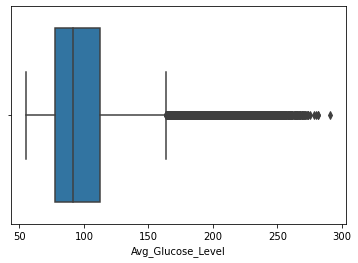

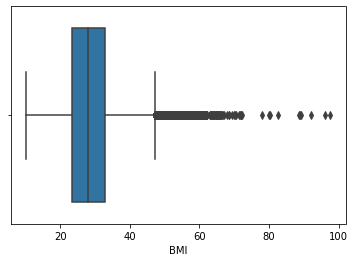

In [53]:
for feature in ['Avg_Glucose_Level','BMI']:
    sns.boxplot(feature,data=df1)
    plt.show()

In [54]:
#### USING IQR:
 
for feature in ['Avg_Glucose_Level','BMI']:
    print('Feature:',feature)
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1 
    print('Value of Interquartile Range :-',IQR)
    
    # Calculate Lower Limit and Upper limit value to remove outliers
    
    Lower_Limit = Q1 - 1.5 * IQR            
    print('Lower Limit to detect outliers :- ',Lower_Limit)

    Upper_Limit = Q3 + 1.5 * IQR      
    print('Upper Limit to detect outliers :- ',Upper_Limit)
    
    dfiqr = df1[~((df1[feature] < Lower_Limit ) | (df1[feature] > Upper_Limit))]
    
    print()

print('Original data set shape :-',df1.shape)

print('Removed outlier data set shape :- ',dfiqr.shape)

Feature: Avg_Glucose_Level
Value of Interquartile Range :- 34.52999999999999
Lower Limit to detect outliers :-  25.745000000000026
Upper Limit to detect outliers :-  163.86499999999998

Feature: BMI
Value of Interquartile Range :- 9.5
Lower Limit to detect outliers :-  9.149999999999999
Upper Limit to detect outliers :-  47.15

Original data set shape :- (43400, 15)
Removed outlier data set shape :-  (42455, 15)


In [55]:
df1.shape

(43400, 15)

#### Splitting data into Dependent(Y) and Independent(X) variables:

In [56]:
dfiqr.columns

Index(['Gender_Male', 'Gender_Other', 'Age_new', 'Hypertension',
       'Heart_Disease', 'Ever_Married_Yes', 'Work_Type_Never_worked',
       'Work_Type_Private', 'Work_Type_Self-employed', 'Work_Type_children',
       'Residence_Type_Urban', 'Avg_Glucose_Level', 'BMI', 'Smoking_Status',
       'Stroke'],
      dtype='object')

In [57]:
X = dfiqr.drop(columns=['Stroke'], axis=1)
Y = dfiqr.iloc[:,-1]

In [58]:
X.head()

,Gender_Male,Gender_Other,Age_new,Hypertension,Heart_Disease,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Avg_Glucose_Level,BMI,Smoking_Status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,95.12,18.0,0.2
1,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,87.96,39.2,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,110.89,17.6,0.2
3,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,69.04,35.9,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,161.28,19.1,0.8


In [59]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Stroke, dtype: float64

#### Performing train test split:

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [61]:
print("Shape of train data:")
print("\nShape of X train:",X_train.shape)
print("Shape of Y train:",Y_train.shape)

print("\nShape of test data:")
print("\nShape of X test:",X_test.shape)
print("Shape of Y test:",Y_test.shape)

Shape of train data:

Shape of X train: (33964, 14)
Shape of Y train: (33964,)

Shape of test data:

Shape of X test: (8491, 14)
Shape of Y test: (8491,)


#### Performing MinMaxScaling on data:

In [62]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [63]:
print('X_train:\n',X_train)
print('X_test:\n',X_test)

X_train:
 [[ 1.19684108 -0.01716147 -0.04655064 ... -0.24410044  0.60908746
  -0.94073817]
 [ 1.19684108 -0.01716147 -0.04655064 ...  0.5445837   0.74116748
   1.87804871]
 [-0.83553282 -0.01716147 -1.31138736 ...  0.00398    -0.96119713
   1.87804871]
 ...
 [-0.83553282 -0.01716147 -0.04655064 ... -0.76918442  1.13740752
   0.18677658]
 [ 1.19684108 -0.01716147 -1.31138736 ...  0.83593124  0.18349631
   1.87804871]
 [-0.83553282 -0.01716147 -0.04655064 ... -0.24386529 -0.68236155
   0.46865527]]
X_test:
 [[-0.83553282 -0.01716147 -0.04655064 ...  2.63457315  0.79986971
  -0.94073817]
 [-0.83553282 -0.01716147 -1.31138736 ... -0.70922185 -0.88488423
   0.75053396]
 [ 1.19684108 -0.01716147 -1.31138736 ... -0.55120284 -0.93184602
  -0.94073817]
 ...
 [-0.83553282 -0.01716147 -1.31138736 ... -0.23822175 -0.71171266
   1.87804871]
 [-0.83553282 -0.01716147 -1.31138736 ... -0.60505158 -1.1079527
  -0.37698079]
 [-0.83553282 -0.01716147 -0.04655064 ... -0.52392575  2.69301655
  -0.94073817]

#### SMOTE:

In [64]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

#sm = SMOTE(random_state = 2)
smk = SMOTETomek(random_state=42)
X_train_res, Y_train_res = smk.fit_resample(X_train, Y_train)

Before OverSampling, counts of label '1': 618
Before OverSampling, counts of label '0': 33346 



In [65]:

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

print('\nAfter OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of Y_train: {} \n'.format(Y_train_res.shape))

After OverSampling, counts of label '1': 32839
After OverSampling, counts of label '0': 32839

After OverSampling, the shape of X_train: (65678, 14)
After OverSampling, the shape of Y_train: (65678,) 



#### Model Building:

For KNN we need to define number of clusters:

In [66]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3),GaussianNB(),SVC()]
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 KNeighborsClassifier(n_neighbors=3),
 GaussianNB(),
 SVC()]

In [67]:
train_accuracy = []
test_accuracy = []

#### Finding optimal number of 'K' in KNN:

In [68]:
knn = KNeighborsClassifier()

In [69]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,52,2):  #Took the range of k from 1 to 52
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_res,Y_train_res)
    predict_i=knn.predict(X_test)
    error_rate.append(np.mean(predict_i!=Y_test))
error_rate

[0.08644447061594629,
 0.11023436579908139,
 0.1270757272406077,
 0.14061947944882816,
 0.15333882934872217,
 0.16417383111529854,
 0.17241785419856318,
 0.1806618772818278,
 0.18819926981509835,
 0.1942056294900483,
 0.20138970674832174,
 0.2066894358732776,
 0.21505123071487459,
 0.22152867742315394,
 0.22565068896478624,
 0.23036155929808033,
 0.2341302555647156,
 0.23789895183135085,
 0.24425862678129784,
 0.24696737722294193,
 0.2512071605229066,
 0.2566246614061948,
 0.2607466729478271,
 0.26286656459780944,
 0.2653397715227888,
 0.26922623954775643]

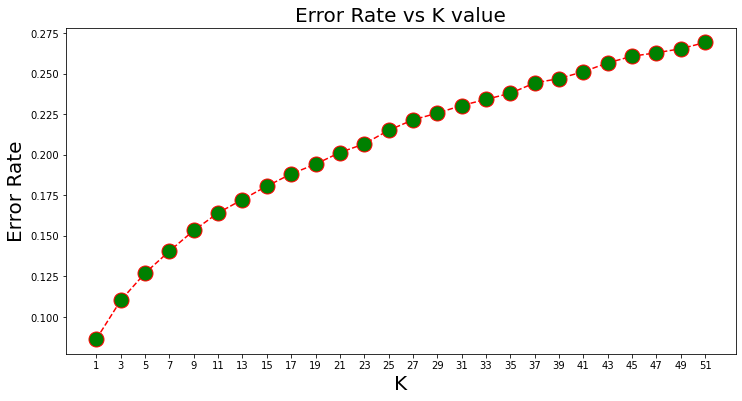

In [70]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,52,2),error_rate,marker="o",markerfacecolor="green",linestyle="dashed",color="red",markersize=15)
plt.title("Error Rate vs K value",fontsize=20)
plt.xlabel("K",fontsize=20)
plt.ylabel("Error Rate",fontsize=20)
plt.xticks(range(1,52,2))
plt.show()

In [71]:
accuracy_train=[]
accuracy_test=[]
for i in range(1,26,2):
    print("K =",i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_res,Y_train_res)
    train_pred=knn.predict(X_train_res)
    test_pred=knn.predict(X_test)
    print("Accuracy of Train data for K =",i,"is",accuracy_score(Y_train_res,train_pred))
    print("Accuracy of Test data for K =",i,"is",accuracy_score(Y_test,test_pred))
    accuracy_train.append(accuracy_score(Y_train_res,train_pred))
    accuracy_test.append(accuracy_score(Y_test,test_pred))

K = 1
Accuracy of Train data for K = 1 is 1.0
Accuracy of Test data for K = 1 is 0.9135555293840537
K = 3
Accuracy of Train data for K = 3 is 0.9748317549255459
Accuracy of Test data for K = 3 is 0.8897656342009186
K = 5
Accuracy of Train data for K = 5 is 0.9597429885197478
Accuracy of Test data for K = 5 is 0.8729242727593923
K = 7
Accuracy of Train data for K = 7 is 0.9493133164834495
Accuracy of Test data for K = 7 is 0.8593805205511719
K = 9
Accuracy of Train data for K = 9 is 0.9410152562501903
Accuracy of Test data for K = 9 is 0.8466611706512778
K = 11
Accuracy of Train data for K = 11 is 0.934041840494534
Accuracy of Test data for K = 11 is 0.8358261688847014
K = 13
Accuracy of Train data for K = 13 is 0.9274338439051129
Accuracy of Test data for K = 13 is 0.8275821458014369
K = 15
Accuracy of Train data for K = 15 is 0.9219525564115838
Accuracy of Test data for K = 15 is 0.8193381227181722
K = 17
Accuracy of Train data for K = 17 is 0.9165930753067998
Accuracy of Test data fo

In [72]:
k=[]
for i in range(1,26,2):
    k.append(i)
accuracy=pd.DataFrame(columns=['K','Train','Test'])
accuracy['K']=k
accuracy['Train']=accuracy_train
accuracy['Test']=accuracy_test
accuracy

,K,Train,Test
0,1,1.000000,0.913556
1,3,0.974832,0.889766
2,5,0.959743,0.872924
3,7,0.949313,0.859381
4,9,0.941015,0.846661
5,11,0.934042,0.835826
6,13,0.927434,0.827582
7,15,0.921953,0.819338
8,17,0.916593,0.811801
9,19,0.912284,0.805794


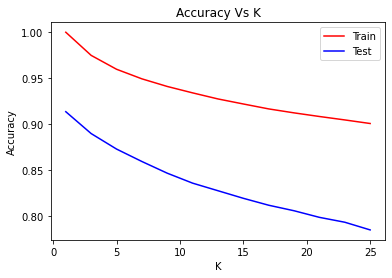

In [73]:
plt.plot(k, accuracy['Train'],color='red',label='Train')
plt.plot(k, accuracy['Test'],color='blue',label='Test')
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()
plt.title("Accuracy Vs K")
plt.show()

#### Fitting all the models in loop and computing train and test accuracies, confusion matrix and classification report:

#### Logistic Regression Model:

In [74]:
log = LogisticRegression()
log.fit(X_train_res,Y_train_res)

print('Logistic Regression model with threshold value = 0.5')
print('Intercept: ',log.intercept_)
print('\nCo-efficient:  ',log.coef_)

print('\nPredicting Y_train and Y_test value using X_train and X_test.')
train_pred_log=log.predict(X_train_res)
test_pred_log=log.predict(X_test)
print("Y_train predicted:\n",train_pred_log)
print("\nY_test predicted:\n",test_pred_log)

print("\t\t\t\t\t*****ACCURACY*****\n")
train_acc=accuracy_score(Y_train_res,train_pred_log)
test_acc=accuracy_score(Y_test,test_pred_log)
print("Training accuracy:",accuracy_score(Y_train_res,train_pred_log))
print("Testing accuracy:",accuracy_score(Y_test,test_pred_log))
print('-'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(Y_train_res,train_pred_log))
print("\nConfustion matrix of test data:\n",confusion_matrix(Y_test,test_pred_log))
print('-'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(Y_train_res,train_pred_log))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(Y_test,test_pred_log))
print('+'*100)
    
train_accuracy.append(train_acc)
test_accuracy.append(test_acc)

Logistic Regression model with threshold value = 0.5
Intercept:  [-1.57847841]

Co-efficient:   [[-0.01461245 -0.10855523  1.70951571  0.13808114  0.15508671  0.20697582
  -0.38044853  0.25723837  0.22750664 -0.33939042  0.06156835  0.15940229
  -0.22434638  0.03795255]]

Predicting Y_train and Y_test value using X_train and X_test.
Y_train predicted:
 [0. 0. 0. ... 1. 1. 1.]

Y_test predicted:
 [0. 0. 0. ... 0. 0. 0.]
					*****ACCURACY*****

Training accuracy: 0.7878589482018332
Testing accuracy: 0.6784830997526793
----------------------------------------------------------------------------------------------------

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[22691 10148]
 [ 3785 29054]]

Confustion matrix of test data:
 [[5635 2702]
 [  28  126]]
----------------------------------------------------------------------------------------------------

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-s

#### Threshold optimization for Logistic Regression:

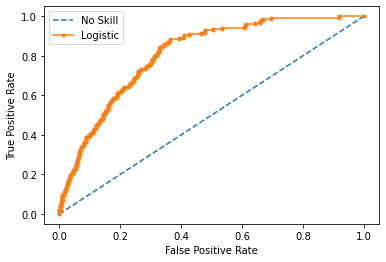

In [75]:
# fit a model
import math
#model = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=5000,random_state=42)
model = LogisticRegression()#parameters based on random search cv below
model.fit(X_train_res, Y_train_res)

# predict probabilities
yhat = model.predict_proba(X_test)

yhat = yhat[:, 1] # keep probabilities for the positive outcome only

# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, yhat)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Best Threshold=0.344174, G-Mean=0.752


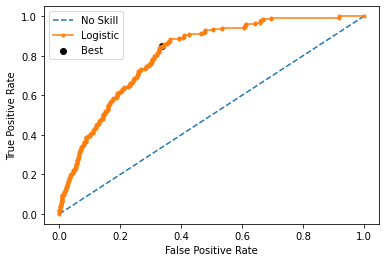

In [76]:
import math
# calculate the g-mean for each threshold
#print('tpr * (1-fpr)',tpr * (1-fpr))
gmeans = np.sqrt(tpr * (1-fpr))

#print('gmeans',gmeans)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### New Logistic model with updated threshold:

In [80]:
log1 = LogisticRegression() #parameters based on random search cv below
log1.fit(X_train_res, Y_train_res) 
THRESHOLD = 0.344174
preds_train = np.where(log1.predict_proba(X_train_res)[:,1] > THRESHOLD, 1, 0)
preds_test = np.where(log1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [81]:
preds_train,preds_test

(array([0, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, ..., 0, 0, 0]))

In [82]:
ytestproba = log1.predict_proba(X_test)
ytestproba

array([[0.82714296, 0.17285704],
       [0.97576645, 0.02423355],
       [0.97970317, 0.02029683],
       ...,
       [0.97382598, 0.02617402],
       [0.99426677, 0.00573323],
       [0.8871912 , 0.1128088 ]])

In [83]:
Y_test

32355    0.0
24931    0.0
22487    0.0
8882     0.0
22455    0.0
        ... 
36594    0.0
34743    0.0
37855    0.0
37828    0.0
11148    0.0
Name: Stroke, Length: 8491, dtype: float64

In [84]:
print('Logistic Regression model with threshold value = 0.263053')
print('Intercept: ',log1.intercept_)
print('\nCo-efficient:  ',log1.coef_)

Logistic Regression model with threshold value = 0.263053
Intercept:  [-1.57847841]

Co-efficient:   [[-0.01461245 -0.10855523  1.70951571  0.13808114  0.15508671  0.20697582
  -0.38044853  0.25723837  0.22750664 -0.33939042  0.06156835  0.15940229
  -0.22434638  0.03795255]]


In [85]:
print("\t\t\t\t*****ACCURACY*****\n")
train_acc=accuracy_score(Y_train_res,preds_train)
test_acc=accuracy_score(Y_test,preds_test)
print("Training accuracy:",accuracy_score(Y_train_res,preds_train))
print("Testing accuracy:",accuracy_score(Y_test,preds_test))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(Y_train_res,preds_train))
print("\nConfustion matrix of test data:\n",confusion_matrix(Y_test,preds_test))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(Y_train_res,preds_train))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(Y_test,preds_test))
print('_'*100)

train_accuracy.append(train_acc)
test_accuracy.append(test_acc)

				*****ACCURACY*****

Training accuracy: 0.794878041353269
Testing accuracy: 0.6675303262277705
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[22300 10539]
 [ 2933 29906]]

Confustion matrix of test data:
 [[5538 2799]
 [  24  130]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

         0.0       0.88      0.68      0.77     32839
         1.0       0.74      0.91      0.82     32839

    accuracy                           0.79     65678
   macro avg       0.81      0.79      0.79     65678
weighted avg       0.81      0.79      0.79     65678

---------------------------------------------------------------------------
Classification Report of test data:

               precision

There no significant improvement in the accuracy even after thresholding. Hence, Proceeding with other models to find the best model.

#### Fitting Decision Tree, Random Forest, KNN, Naive Bayes, SVM and XG Boost models:

In [86]:
for model in models:
    print('Model: {}'.format(model))
    print('\nFitting the model.')
    model.fit(X_train_res,Y_train_res)
        
    print('\nPredicting Y_train and Y_test value using X_train and X_test.')
    train_pred=model.predict(X_train_res)
    test_pred=model.predict(X_test)
    print("Y_train predicted:\n",train_pred)
    print("\nY_test predicted:\n",test_pred)
    
    print("\t\t\t\t\t*****ACCURACY*****\n")
    train_acc=accuracy_score(Y_train_res,train_pred)
    test_acc=accuracy_score(Y_test,test_pred)
    print("Training accuracy:",accuracy_score(Y_train_res,train_pred))
    print("Testing accuracy:",accuracy_score(Y_test,test_pred))
    print('-'*100)

    print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
    print("Confustion matrix of train data:\n",confusion_matrix(Y_train_res,train_pred))
    print("\nConfustion matrix of test data:\n",confusion_matrix(Y_test,test_pred))
    print('-'*100)

    print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
    print("Classification Report of train data:\n\n",classification_report(Y_train_res,train_pred))
    print('-'*75)
    print("Classification Report of test data:\n\n",classification_report(Y_test,test_pred))
    print('+'*100)
    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

Model: DecisionTreeClassifier()

Fitting the model.

Predicting Y_train and Y_test value using X_train and X_test.
Y_train predicted:
 [0. 0. 0. ... 1. 1. 1.]

Y_test predicted:
 [0. 0. 0. ... 0. 0. 0.]
					*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 0.9206218348839948
----------------------------------------------------------------------------------------------------

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[32839     0]
 [    0 32839]]

Confustion matrix of test data:
 [[7788  549]
 [ 125   29]]
----------------------------------------------------------------------------------------------------

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32839
         1.0       1.00      1.00      1.00     32839

    accuracy                           1.00     65678
   macro avg       1.00      1.00      1.00     65678
we

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
eval_set=[(X_test,Y_test)]
xgb.fit(X_train_res,Y_train_res,early_stopping_rounds =10,eval_set=eval_set,verbose = True)

[11:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.57917
[1]	validation_0-logloss:0.52253
[2]	validation_0-logloss:0.47385
[3]	validation_0-logloss:0.45112
[4]	validation_0-logloss:0.43399
[5]	validation_0-logloss:0.41303
[6]	validation_0-logloss:0.40057
[7]	validation_0-logloss:0.39150
[8]	validation_0-logloss:0.38219
[9]	validation_0-logloss:0.37527
[10]	validation_0-logloss:0.36963
[11]	validation_0-logloss:0.35697
[12]	validation_0-logloss:0.34840
[13]	validation_0-logloss:0.34363
[14]	validation_0-logloss:0.34032
[15]	validation_0-logloss:0.32930
[16]	validation_0-logloss:0.32345
[17]	validation_0-logloss:0.31372
[18]	validation_0-logloss:0.31029
[19]	validation_0-logloss:0.30712
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
pred_xgb_train = xgb.predict(X_train_res)
pred_xgb_test = xgb.predict(X_test)

print("\t\t\t\t\t*****ACCURACY*****\n")
train_acc_xgb=accuracy_score(Y_train_res,pred_xgb_train)
test_acc_xgb=accuracy_score(Y_test,pred_xgb_test)
print("Training accuracy:",accuracy_score(Y_train_res,pred_xgb_train))
print("Testing accuracy:",accuracy_score(Y_test,pred_xgb_test))

print('-'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(Y_train_res,pred_xgb_train))
print("\nConfustion matrix of test data:\n",confusion_matrix(Y_test,pred_xgb_test))
print('-'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(Y_train_res,pred_xgb_train))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(Y_test,pred_xgb_test))
print('+'*100)
    
train_accuracy.append(train_acc_xgb)
test_accuracy.append(test_acc_xgb)

					*****ACCURACY*****

Training accuracy: 0.9633362769877281
Testing accuracy: 0.9159109645507008
----------------------------------------------------------------------------------------------------

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[31275  1564]
 [  844 31995]]

Confustion matrix of test data:
 [[7747  590]
 [ 124   30]]
----------------------------------------------------------------------------------------------------

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     32839
         1.0       0.95      0.97      0.96     32839

    accuracy                           0.96     65678
   macro avg       0.96      0.96      0.96     65678
weighted avg       0.96      0.96      0.96     65678

---------------------------------------------------------------------------
Classification Report of test data:

               precisi

In [96]:
mdl = ['Logistic Regression (T=0.5)','Logistic Regression (T=0.344174)','Decision Tree Classifier','Random Forest Classifier','K Neighbors Classifier','Gaussian Naive Bayes','Support Vector Classifier','XG Boost Classifier']
summary = pd.DataFrame(columns=['Train Accuracy','Test Accuracy'],index = mdl)
summary['Train Accuracy']=train_accuracy
summary['Test Accuracy']=test_accuracy
summary

,Train Accuracy,Test Accuracy
Logistic Regression (T=0.5),0.787859,0.678483
Logistic Regression (T=0.344174),0.794878,0.667530
Decision Tree Classifier,1.000000,0.920622
Random Forest Classifier,1.000000,0.928748
K Neighbors Classifier,0.974832,0.889766
Gaussian Naive Bayes,0.638951,0.286185
Support Vector Classifier,0.846493,0.747262
XG Boost Classifier,0.963336,0.915911


# 
Since I performed SMOTE I am taking Accuracy as my metrics and from the above we can see that my optimal model is XGBoost Classifier.

#### Hyperparamter Tuning using RandomSearchCV for XGBOOST:

In [97]:
classifier=XGBClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': True,
 'validate_parameters': None,
 'verbosity': None}


In [98]:
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
params_xgb={
     "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
     "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [1, 3, 5, 7],
     "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
     "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
    }
params_xgb

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [99]:
from sklearn.model_selection import RandomizedSearchCV
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params_xgb,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)
# Fit the random search model
random_search.fit(X_train_res, Y_train_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[11:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [100]:
print('Best parameters:',random_search.best_params_)
print('\nBest Score:',random_search.best_score_)
print('\nBest Estimator:',random_search.best_estimator_)

Best parameters: {'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.4, 'colsample_bytree': 0.7}

Best Score: 0.9954342896543336

Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


#### Fitting XGBOOST MODEL AFTER PARAMETER TUNIGN:

In [103]:
xgb_tuned = XGBClassifier(min_child_weight= 7,max_depth= 12,learning_rate= 0.25,gamma= 0.4,colsample_bytree=0.7)
eval_set=[(X_test,Y_test)]
#clf.fit(X_train_res,Y_train_res,early_stopping_rounds =10,eval_metric='logloss',eval_set=eval_set,verbose = True)
xgb_tuned.fit(X_train_res,Y_train_res,early_stopping_rounds =10,eval_set=eval_set,verbose = True)
#clf.fit(X_train_res,Y_train_res)

[11:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.55704
[1]	validation_0-logloss:0.47447
[2]	validation_0-logloss:0.42924
[3]	validation_0-logloss:0.38260
[4]	validation_0-logloss:0.36231
[5]	validation_0-logloss:0.33477
[6]	validation_0-logloss:0.30907
[7]	validation_0-logloss:0.29031
[8]	validation_0-logloss:0.28286
[9]	validation_0-logloss:0.27306
[10]	validation_0-logloss:0.26427
[11]	validation_0-logloss:0.25668
[12]	validation_0-logloss:0.25029
[13]	validation_0-logloss:0.24737
[14]	validation_0-logloss:0.24498
[15]	validation_0-logloss:0.24138
[16]	validation_0-logloss:0.23909
[17]	validation_0-logloss:0.23647
[18]	validation_0-logloss:0.23266
[19]	validation_0-logloss:0.23134
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [104]:
pred_xgb_train = xgb_tuned.predict(X_train_res)
pred_xgb_test = xgb_tuned.predict(X_test)

print("\t\t\t\t\t*****ACCURACY*****\n")
train_acc_xgb=accuracy_score(Y_train_res,pred_xgb_train)
test_acc_xgb=accuracy_score(Y_test,pred_xgb_test)
print("Training accuracy:",accuracy_score(Y_train_res,pred_xgb_train))
print("Testing accuracy:",accuracy_score(Y_test,pred_xgb_test))
#print("Training recall_score:",recall_score(Y_train_res,pred_xgb_train))
#print("Testing recall_score:",recall_score(Y_test,pred_xgb_test))
print('-'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(Y_train_res,pred_xgb_train))
print("\nConfustion matrix of test data:\n",confusion_matrix(Y_test,pred_xgb_test))
print('-'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(Y_train_res,pred_xgb_train))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(Y_test,pred_xgb_test))
print('+'*100)
    
train_accuracy.append(train_acc_xgb)
test_accuracy.append(test_acc_xgb)

					*****ACCURACY*****

Training accuracy: 0.9838302018940893
Testing accuracy: 0.9450005888587917
----------------------------------------------------------------------------------------------------

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[32215   624]
 [  438 32401]]

Confustion matrix of test data:
 [[8003  334]
 [ 133   21]]
----------------------------------------------------------------------------------------------------

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     32839
         1.0       0.98      0.99      0.98     32839

    accuracy                           0.98     65678
   macro avg       0.98      0.98      0.98     65678
weighted avg       0.98      0.98      0.98     65678

---------------------------------------------------------------------------
Classification Report of test data:

               precisi

Thus, after fine tuning and comparing other models' performance, we conclude that XGBoost is the best fit model for this case.

# --------------------------------------------------------------------------------------------------------------